# Notebook de preprocesamiento de simulaciones Geant4 de HAWC para Red cGAN

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import os
import gc
import random

from timeit import default_timer as timer
from datetime import timedelta

Process time: 6 days, 13:05:14.338741
proton ENERGY: 0.0-1962241.97695898
gamma   ENERGY: 0.0-499939.696181248
proton NMAX: 0.0-49420107776.0


NameError: name 'NMx' is not defined

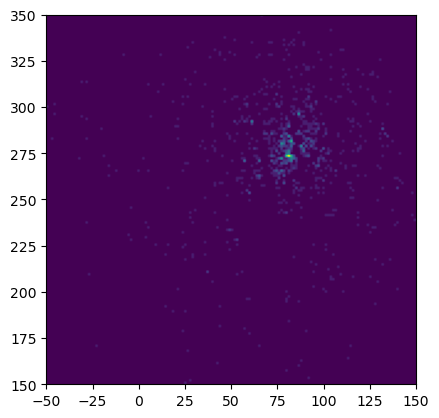

In [6]:
raw_data_dirs=['proton','gamma']
hawc_data='g4sim/'
image_dir='hawc_image2/'
meta_dir='hawc_meta2/'

imin=0
imax=1
Energy={}
NMax={}
Theta={}
Phi={}
Energy['proton']=[0.,0.]
Energy['gamma'] =[0.,0.]
NMax['proton']=[0.,0.]
NMax['gamma'] =[0.,0.]
Theta['proton']=[0.,0.]
Theta['gamma']=[0.,0.]
Phi['proton']=[0.,0.]
Phi['gamma']=[0.,0.]


for directory in raw_data_dirs:
    if not os.path.exists(image_dir+directory):
        os.mkdir(image_dir+directory)

#bbox_inches=mpl.transforms.Bbox([[0.72, 0.59 ], [5, 4.87]])
bbox_inches=mpl.transforms.Bbox([[1.5, 0.55 ], [5, 4.05]])


start_t=timer()
for particle in raw_data_dirs:
    raw_data=os.listdir(hawc_data+particle)

    counter=0
    for file in raw_data:
        counter=counter+1
        if counter>2000:
            break
            
        raw_path=os.path.join(hawc_data+particle,file)
        if not os.path.isfile(raw_path):
            continue
                
        # Turn interactive plotting off
        plt.ioff()
        df = pd.read_csv(raw_path,nrows=500000,low_memory=False) #[['rec.coreX/F/0.1','rec.coreY/F/0.1','rec.nHitSP10/U/1']]
        
        #df = df.drop(df[df['rec.coreX/F/0.1'] > 150].index)
        #df = df.drop(df[df['rec.coreX/F/0.1'] < -50].index)
        #df = df.drop(df[df['rec.coreY/F/0.1'] > 350].index)
        #df = df.drop(df[df['rec.coreY/F/0.1'] < 150].index)
        df = df.drop(df[df['HAWCSim.Evt.nWHit/U/1'] < 500].index)

        eventIDs=df['HAWCSim.Evt.Num/U/1'].unique()
        
        if df['HAWCSim.Evt.Energy/F/0'].max()>Energy[particle][imax]:
            Energy[particle][imax]=df['HAWCSim.Evt.Energy/F/0'].max()
        if df['HAWCSim.Evt.Energy/F/0'].min()<Energy[particle][imin]:
            Energy[particle][imin]=df['HAWCSim.Evt.Energy/F/0'].min()

        if df['HAWCSim.Evt.NMax/F/0.001'].max()>NMax[particle][imax]:
            NMax[particle][imax]=df['HAWCSim.Evt.NMax/F/0.001'].max()
        if df['HAWCSim.Evt.NMax/F/0.001'].min()<NMax[particle][imin]:
            NMax[particle][imin]=df['HAWCSim.Evt.NMax/F/0.001'].min()

        if df['HAWCSim.Evt.Theta/F/0.001'].max()>Theta[particle][imax]:
            Theta[particle][imax]=df['HAWCSim.Evt.Theta/F/0.001'].max()
        if df['HAWCSim.Evt.Theta/F/0.001'].min()<Theta[particle][imin]:
            Theta[particle][imin]=df['HAWCSim.Evt.Theta/F/0.001'].min()

        if df['HAWCSim.Evt.Phi/F/0.001'].max()>Phi[particle][imax]:
            Phi[particle][imax]=df['HAWCSim.Evt.Phi/F/0.001'].max()
        if df['HAWCSim.Evt.Phi/F/0.001'].min()<Phi[particle][imin]:
            Phi[particle][imin]=df['HAWCSim.Evt.Phi/F/0.001'].min()
                                        
        for event in eventIDs:
        #for TS in timeSliceIDs:
            #image_path=os.path.join(image_dir+directory,str(TS)+file.replace('.csv','.png'))
            image_path=os.path.join(image_dir+particle,str(event)+'-'+file.replace('.csv','.png'))
            meta_path =os.path.join(meta_dir +particle,str(event)+'-'+file)
            
            #print(image_path)
            #cut_df = df[df['rec.eventID/U/1']==eventIDs[event]]
            cut_df = df[df['HAWCSim.Evt.Num/U/1']==event]
            #cut_df = df[df['HAWCSim.Evt.Num/U/1']==event]
            #cut_df = df[df['rec.timeSliceID/U/1']==TS]
        
            #print (eventIDs)
        
            #print(df.columns)
            #cut_df = cut_df.drop(cut_df[cut_df['rec.coreX/F/0.1'] > 150].index)
            #cut_df = cut_df.drop(cut_df[cut_df['rec.coreX/F/0.1'] < -50].index)
            #cut_df = cut_df.drop(cut_df[cut_df['rec.coreY/F/0.1'] > 350].index)
            #cut_df = cut_df.drop(cut_df[cut_df['rec.coreY/F/0.1'] < 150].index)
        
                      
            #offsetX=random.randrange(-75,75)
            #offsetY=random.randrange(-75,75)
            #amplitude=random.randrange(600,610)
            
            #weights=df['rec.nHitTot/U/1']*np.square(np.sin((100+df['rec.coreX/F/0.1']+offsetX)*(1/amplitude)*2*3.1416))
            #weights=weights*np.square(np.sin((df['rec.coreY/F/0.1']+offsetY-100)*(1/amplitude)*2*3.1416))
            
            if True or not os.path.exists(meta_path):
                with open(meta_path,"w") as meta_file:
                    meta_file.write('HAWCSim.Evt.Energy/F/0,HAWCSim.Evt.X/F/0.01,HAWCSim.Evt.Y/F/0.01,HAWCSim.Evt.NMax/F/0.001,HAWCSim.Evt.Theta/F/0.001,HAWCSim.Evt.Phi/F/0.001\n')
                    meta_file.write(f"{cut_df['HAWCSim.Evt.Energy/F/0'].to_numpy()[0]},"
                                f"{cut_df['HAWCSim.Evt.X/F/0.01'].to_numpy()[0]},"
                                f"{cut_df['HAWCSim.Evt.Y/F/0.01'].to_numpy()[0]},"    
                                f"{cut_df['HAWCSim.Evt.NMax/F/0.001'].to_numpy()[0]}," 
                                f"{cut_df['HAWCSim.Evt.Theta/F/0.001'].to_numpy()[0]}," 
                                f"{cut_df['HAWCSim.Evt.Phi/F/0.001'].to_numpy()[0]}")
            
            if  not os.path.exists(image_path):
                x_wh = [ float(x)/100.0 for x in cut_df['HAWCSim.WH.XNE[HAWCSim.Evt.nWHit]/F/1e-05'].str.split(':',expand=False).to_list()[0] ]
                y_wh = [ float(x)/100.0 for x in cut_df['HAWCSim.WH.YNE[HAWCSim.Evt.nWHit]/F/1e-05'].str.split(':',expand=False).to_list()[0] ]
                heatmap, xedges, yedges = np.histogram2d(
                                                  x=x_wh, 
                                                  y=y_wh, 
                                                  bins=150,
                                                  )#weights=weights)
                extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            
                extent = [-50, 150, 150, 350]         
                plt.imshow(heatmap.T, extent=extent, origin='lower')

                #print(heatmap.shape)
                #print(heatmap)
                #print(x_wh)
                #print(y_wh)
 
        
            #extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
                extent = [-50, 150, 150, 350]

                plt.savefig(image_path, dpi=50, bbox_inches=bbox_inches)

            #plt.show()
            #@eml del cut_df
           
            gc.collect()
            #break
        del df
stop_t=timer()

print (f'Process time: {timedelta(seconds=stop_t-start_t)}')

print (f"proton ENERGY: {Energy['proton'][imin]}-{Energy['proton'][imax]}")
print (f"gamma   ENERGY: {Energy['gamma'][imin]}-{Energy['gamma'][imax]}")

print (f"proton NMAX: {NMax['proton'][imin]}-{NMax['proton'][imax]}")
print (f"gamma   NMAX: {NMx['gamma'][imin]}-{NMax['gamma'][imax]}")

print (f"pronton THETA: {Theta['proton'][imin]}-{Theta['proton'][imax]}")
print (f"gamma   THETA: {Theta['gamma'][imin]}-{Theta['gamma'][imax]}")

print (f"proton PHI: {Phi['proton'][imin]}-{Phi['proton'][imax]}")
print (f"gamma   PHI: {Phi['gamma'][imin]}-{Phi['gamma'][imax]}")



pronton energy: 8699.352449024-60208.063709184

gamma energy:   0-0

------------------------

Process time: 1:03:57.232648

pronton ENERGY: 0.0-0.0

gamma   ENERGY: 1909222.7531735-1962241.97695898

pronton NMAX: 0.0-0.0


In [7]:
print (f'Process time: {timedelta(seconds=stop_t-start_t)}')

print (f"pronton ENERGY: {Energy['proton'][imin]}-{Energy['proton'][imax]}")
print (f"gamma   ENERGY: {Energy['gamma'][imin]}-{Energy['gamma'][imax]}")

print (f"pronton NMAX: {NMax['proton'][imin]}-{NMax['proton'][imax]}")
print (f"gamma   NMAX: {NMax['gamma'][imin]}-{NMax['gamma'][imax]}")

print (f"pronton THETA: {Theta['proton'][imin]}-{Theta['proton'][imax]}")
print (f"gamma   THETA: {Theta['gamma'][imin]}-{Theta['gamma'][imax]}")

print (f"pronton PHI: {Phi['proton'][imin]}-{Phi['proton'][imax]}")
print (f"gamma   PHI: {Phi['gamma'][imin]}-{Phi['gamma'][imax]}")

Process time: 6 days, 13:05:14.338741
pronton ENERGY: 0.0-1962241.97695898
gamma   ENERGY: 0.0-499939.696181248
pronton NMAX: 0.0-49420107776.0
gamma   NMAX: 0.0-50396700.0
pronton THETA: 0.0-64.41
gamma   THETA: 0.0-62.779
pronton PHI: 0.0-359.983
gamma   PHI: 0.0-359.977
